In [1]:
import numpy as np
import pandas as pd
import os
import pickle

In [2]:
covid_raw=pd.read_csv("RealData/Modeldata.csv") #around Los Angeles
#district_12=pd.read_csv("./d12_text_meta_2020_12_08.txt",sep="\t") 

In [3]:
covid_raw["daycount"].unique()

array([  8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147], dtype=int64)

In [4]:
covid_raw["week_count"]=covid_raw["daycount"]//7
covid_raw["week_count"].value_counts()

11    2807
2     2807
18    2807
17    2807
16    2807
15    2807
14    2807
13    2807
12    2807
10    2807
20    2807
9     2807
8     2807
7     2807
6     2807
5     2807
4     2807
3     2807
19    2807
1     2406
21     401
Name: week_count, dtype: int64

In [5]:
covid_agg=covid_raw.groupby(['id','week_count']).mean()
covid_agg.reset_index(inplace=True)

In [6]:
covid_raw.columns

Index(['Weekday (report)', 'Holiday (report)', 'iso_3166_2_code',
       'census_fips_code', 'Mobility (retail and recreation)',
       'Mobility (grocery and pharmacy)', 'Mobility (parks)',
       'Mobility (transit stations)', 'Mobility (workplaces)',
       'Mobility (residential)', 'Mobility (mean)', 'Weekday (exposure)',
       'Weather (rainfall)', 'Weather (temperature)', 'Weather (humidity)',
       'Weather (wind)', 'Searches corona', 'Ban of mass gatherings',
       'School/Kita closures', 'Contact restrictions', 'Holiday',
       'Mandatory face masks', 'Socio-economic status',
       'Age (pop. 65 and older)', 'Foreign residents',
       'Foreign residents (refugees)', 'Turnout',
       'Right-wing populist party votes', 'Population density', 'Sex',
       'Age (pop. younger 18)', 'Nursing homes', 'COVID-19 burden', 'id',
       'bl_id', 'date', 'cases', 'deaths', 'recovered',
       'Reported new cases COVID-19', 'Active cases', 'daycount',
       'week_count'],
      dtyp

In [7]:
#feature_list=["Mandatory face masks","Contact restrictions","Mobility (mean)","Weather (temperature)","Reported new cases COVID-19"]
feature_list=["Contact restrictions","Mobility (mean)","Searches corona","Reported new cases COVID-19"]

In [8]:
top_list=pd.DataFrame(covid_agg.groupby(['id'])["Reported new cases COVID-19"].mean().sort_values(ascending=False)).reset_index()["id"].to_list()[3:30]

In [9]:
#df_select=covid_agg[covid_agg["id"].isin(covid_agg['id'].unique()[:30])].sort_values(["week_count","id"])
df_select=covid_agg[covid_agg["id"].isin(top_list)].sort_values(["week_count","id"])
df_select=df_select[df_select["week_count"]<21]
#df_select["prop"]=df_select["Reported new cases COVID-19"]/df_select["Population density"]
df_select

,id,week_count,Holiday (report),census_fips_code,Mobility (retail and recreation),Mobility (grocery and pharmacy),Mobility (parks),Mobility (transit stations),Mobility (workplaces),Mobility (residential),...,Age (pop. younger 18),Nursing homes,COVID-19 burden,bl_id,cases,deaths,recovered,Reported new cases COVID-19,Active cases,daycount
525,3159000,1,-0.035714,NaN,29.115568,5.940524,-35.096782,33.080228,22.458639,-7.793172,...,-1.072569,50.890274,-3.497203,3.0,0.000000,0.0,0.0,0.000000,0.000000,10.5
546,3241000,1,-0.035714,NaN,29.115568,5.940524,-35.096782,33.080228,22.458639,-7.793172,...,0.327431,181.890274,-3.497203,3.0,0.000000,0.0,0.0,0.000000,0.000000,10.5
1197,3459000,1,-0.035714,NaN,29.115568,5.940524,-35.096782,33.080228,22.458639,-7.793172,...,1.727431,53.890274,-3.497203,3.0,0.000000,0.0,0.0,0.000000,0.000000,10.5
1281,4011000,1,-0.035714,NaN,26.448902,0.773857,-27.763449,30.746895,21.791972,-7.793172,...,-0.372569,95.890274,-3.497203,4.0,0.000000,0.0,0.0,0.000000,0.000000,10.5
1323,5111000,1,-0.035714,NaN,30.282235,6.107190,-30.930115,34.913561,22.291972,-7.959838,...,-0.172569,28.890274,-3.497203,5.0,0.000000,0.0,0.0,0.000000,0.000000,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,8417000,20,-0.035714,NaN,17.044140,5.797667,36.593694,11.437371,8.387211,-3.697934,...,0.227431,2.890274,-2.354346,8.0,1224.142857,77.0,1144.0,0.285714,13.142857,143.0
5017,9184000,20,-0.035714,NaN,17.758425,4.369095,40.736551,7.723085,8.244353,-4.269362,...,2.027431,4.890274,-1.497203,9.0,1468.285714,91.0,1356.0,2.000000,29.000000,143.0
5080,9187000,20,-0.035714,NaN,17.758425,4.369095,40.736551,7.723085,8.244353,-4.269362,...,1.027431,22.890274,-3.068632,9.0,2303.285714,199.0,2088.0,1.428571,16.285714,143.0
5122,9189000,20,-0.035714,NaN,17.758425,4.369095,40.736551,7.723085,8.244353,-4.269362,...,0.127431,-9.109726,-3.354346,9.0,1306.000000,88.0,1218.0,0.000000,1.428571,143.0


In [10]:
covid_norm=(df_select-df_select.min())/(df_select.max()-df_select.min())
covid_norm[feature_list]

,Contact restrictions,Mobility (mean),Searches corona,Reported new cases COVID-19
525,0.0,0.659756,0.000375,0.000000
546,0.0,0.659756,0.000375,0.000000
1197,0.0,0.659756,0.000375,0.000000
1281,0.0,0.649797,0.001270,0.000000
1323,0.0,0.679675,0.000875,0.000000
...,...,...,...,...
4534,1.0,0.739024,0.167660,0.002561
5017,1.0,0.736179,0.163377,0.017926
5080,1.0,0.736179,0.163377,0.012804
5122,1.0,0.736179,0.163377,0.000000



Bad key "text.kerning_factor" on line 4 in
D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


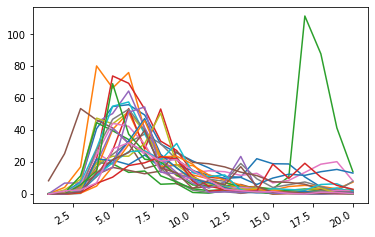

In [11]:
import matplotlib.dates as mdates
import datetime
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np 
x_values = df_select["week_count"].unique()
#y_values =df_select[df_select["id"]==11000000][["Reported new cases COVID-19"]]

ax = plt.gca()

for i in range(27):
    #y_values =df_select[df_select["id"]==df_select['id'].unique()[i]][["Reported new cases COVID-19"]]
    y_values =df_select[df_select["id"]==top_list[i]][["Reported new cases COVID-19"]]
    plt.plot(x_values,y_values)
plt.gcf().autofmt_xdate()
plt.show()

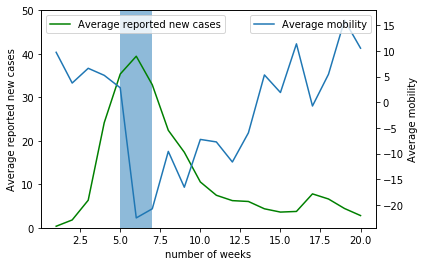

In [88]:
fig, ax = plt.subplots()
#ax.plot(s)
x_values = df_select["week_count"].unique()
y_values =df_select.groupby("week_count").mean()["Reported new cases COVID-19"]
ax.plot(x_values,y_values,color="green")
ax.legend(["Average reported new cases"],loc='upper left')
ax.set(xlabel='number of weeks', ylabel='Average reported new cases')
plt.ylim([0, 50])
ax.fill_between(range(5,8),[50,50,50],alpha=0.5)
#ax.grid()
ax2=ax.twinx()
ax2.set(ylabel='Average mobility')
ax2.plot(x_values,df_select.groupby("week_count").mean()["Mobility (mean)"])
ax2.legend(['Average mobility'],loc='upper right')
plt.savefig('figure/realdata.pdf')

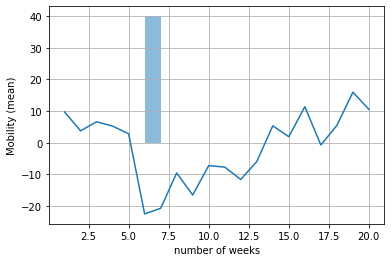

In [43]:
fig, ax = plt.subplots()
#ax.plot(s)
x_values = df_select["week_count"].unique()
y_values =df_select.groupby("week_count").mean()["Mobility (mean)"]
ax.plot(x_values,y_values)
ax.set(xlabel='number of weeks', ylabel='Mobility (mean)')
ax.fill_between(range(6,8),[40,40],alpha=0.5)
ax.grid()

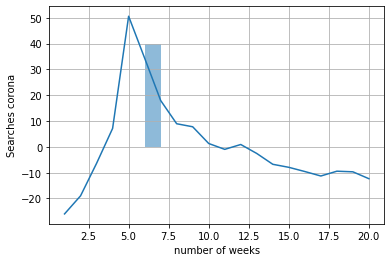

In [45]:
fig, ax = plt.subplots()
#ax.plot(s)
x_values = df_select["week_count"].unique()
y_values =df_select.groupby("week_count").mean()["Searches corona"]
ax.plot(x_values,y_values)
ax.set(xlabel='number of weeks', ylabel='Searches corona')
ax.fill_between(range(6,8),[40,40],alpha=0.5)
ax.grid()

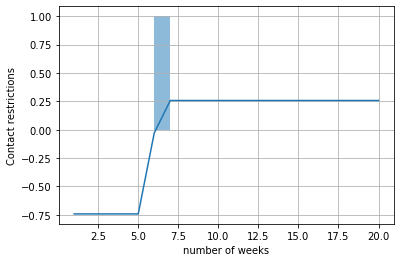

In [47]:
fig, ax = plt.subplots()
#ax.plot(s)
x_values = df_select["week_count"].unique()
y_values =df_select.groupby("week_count").mean()["Contact restrictions"]
ax.plot(x_values,y_values)
ax.set(xlabel='number of weeks', ylabel='Contact restrictions')
ax.fill_between(range(6,8),[1,1],alpha=0.5)
ax.grid()

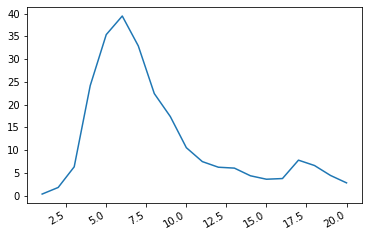

In [12]:
x_values = df_select["week_count"].unique()
#y_values =df_select[df_select["id"]==11000000][["Reported new cases COVID-19"]]

ax = plt.gca()
y_values =df_select.groupby("week_count").mean()["Reported new cases COVID-19"]
plt.plot(x_values,y_values)
plt.gcf().autofmt_xdate()
plt.show()



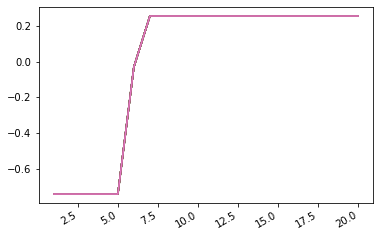

In [13]:
import matplotlib.dates as mdates
import datetime
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np 
x_values = df_select["week_count"].unique()
#y_values =df_select[df_select["id"]==11000000][["Reported new cases COVID-19"]]

ax = plt.gca()

for i in range(27):
    #y_values =df_select[df_select["id"]==df_select['id'].unique()[i]][["Reported new cases COVID-19"]]
    y_values =df_select[df_select["id"]==top_list[i]][["Contact restrictions"]]
    plt.plot(x_values,y_values)
plt.gcf().autofmt_xdate()
plt.show()


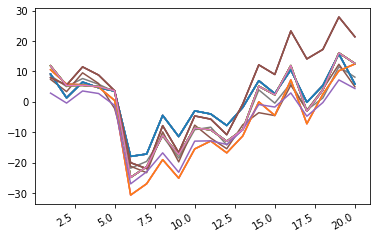

In [41]:
x_values = df_select["week_count"].unique()
#y_values =df_select[df_select["id"]==11000000][["Reported new cases COVID-19"]]

ax = plt.gca()

for i in range(27):
    #y_values =df_select[df_select["id"]==df_select['id'].unique()[i]][["Reported new cases COVID-19"]]
    y_values =df_select[df_select["id"]==top_list[i]][["Mobility (mean)"]]
    plt.plot(x_values,y_values)
plt.gcf().autofmt_xdate()
plt.show()


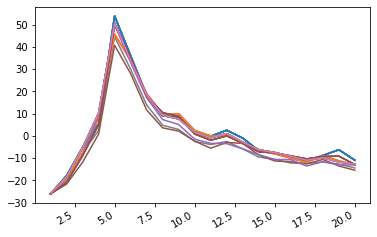

In [418]:
x_values = df_select["week_count"].unique()
#y_values =df_select[df_select["id"]==11000000][["Reported new cases COVID-19"]]

ax = plt.gca()

for i in range(27):
    #y_values =df_select[df_select["id"]==df_select['id'].unique()[i]][["Reported new cases COVID-19"]]
    y_values =df_select[df_select["id"]==top_list[i]][["Searches corona"]]
    plt.plot(x_values,y_values)
plt.gcf().autofmt_xdate()
plt.show()

In [420]:
aa=df_select/df_select.std()

In [421]:
aa[feature_list].describe()

,Contact restrictions,Mobility (mean),Searches corona,Reported new cases COVID-19
count,540.000000,540.000000,540.000000,540.000000
mean,-0.016626,-0.104600,0.020425,0.770248
std,1.000000,1.000000,1.000000,1.000000
min,-1.729088,-2.694654,-1.500378,0.000000
25%,-0.482150,-0.809641,-0.574491,0.081204
50%,0.598530,0.200542,-0.298498,0.351885
75%,0.598530,0.512011,0.439208,1.141370
max,0.598530,2.447716,3.097870,7.046719


In [422]:
covid_norm[feature_list].describe()

,Contact restrictions,Mobility (mean),Searches corona,Reported new cases COVID-19
count,540.000000,540.000000,540.000000,540.000000
mean,0.735714,0.503669,0.330735,0.109306
std,0.429624,0.194463,0.217474,0.141910
min,0.000000,0.000000,0.000000,0.000000
25%,0.535714,0.366565,0.201356,0.011524
50%,1.000000,0.563008,0.261378,0.049936
75%,1.000000,0.623577,0.421810,0.161972
max,1.000000,1.000000,1.000000,1.000000


In [423]:
df_select[feature_list].describe()

,Contact restrictions,Mobility (mean),Searches corona,Reported new cases COVID-19
count,540.000000,540.000000,540.000000,540.000000
mean,-0.007143,-1.191391,0.355549,12.195414
std,0.429624,11.389967,17.407251,15.833102
min,-0.742857,-30.692023,-26.117454,0.000000
25%,-0.207143,-9.221785,-10.000311,1.285714
50%,0.257143,2.284168,-5.196025,5.571429
75%,0.257143,5.831787,7.645403,18.071429
max,0.257143,27.879406,53.925403,111.571429


In [13]:
data=df_select[feature_list] ##not normazlied
data

,Contact restrictions,Mobility (mean),Searches corona,Reported new cases COVID-19
525,-0.742857,7.950834,-26.087454,0.000000
546,-0.742857,7.950834,-26.087454,0.000000
1197,-0.742857,7.950834,-26.087454,0.000000
1281,-0.742857,7.367501,-26.015787,0.000000
1323,-0.742857,9.117501,-26.047454,0.000000
...,...,...,...,...
4534,0.257143,12.593691,-12.697454,0.285714
5017,0.257143,12.427025,-13.040311,2.000000
5080,0.257143,12.427025,-13.040311,1.428571
5122,0.257143,12.427025,-13.040311,0.000000


## create basis & function demo


Bad key "text.kerning_factor" on line 4 in
D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


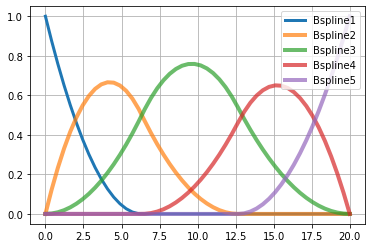

In [10]:
from scipy.interpolate import BSpline
k =2
time_stamp=len(df_select["week_count"].unique())
x = np.array(range(0, time_stamp))
m = 2
step = (x[-1] - x[0]) / (m + 1)
t = [0,0,0]+list(np.linspace(step, m * step, m))+[time_stamp,time_stamp,time_stamp]##create knots
c1 = [1,0,0,0,0]
c2 = [0,1,0,0,0]
c3 = [0,0,1,0,0]
c4 = [0,0,0,1,0]
c5 = [0,0,0,0,1]
spl1 = BSpline(t, c1, k)
spl2 = BSpline(t, c2, k)
spl3 = BSpline(t, c3, k)
spl4 = BSpline(t, c4, k)
spl5 = BSpline(t, c5, k)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xx = np.linspace(0, time_stamp,  50)
ax.plot(xx, spl1(xx), lw=3, label='Bspline1')
ax.plot(xx, spl2(xx), lw=4, alpha=0.7, label='Bspline2')
ax.plot(xx, spl3(xx), lw=4, alpha=0.7, label='Bspline3')
ax.plot(xx, spl4(xx), lw=4, alpha=0.7, label='Bspline4')
ax.plot(xx, spl5(xx), lw=4, alpha=0.7, label='Bspline5')
ax.grid(True)
ax.legend(loc='best')
plt.show()

In [11]:
feature_list

['Contact restrictions',
 'Mobility (mean)',
 'Searches corona',
 'Reported new cases COVID-19']

In [14]:
# ----------- Configurations:
#time_stamp=10
n_timestamp=time_stamp
#sample__time=30
n =data.shape[0]
d=data.shape[1]
sample__time=int(n/n_timestamp)
n_var = data.shape[1] # The number of variables in data.
x_dims = 1 # The number of input dimensions: default 1.
z_dims = d # The number of latent variable dimensions: default the same as variable size.


In [430]:
sample__time

27

In [431]:
n_timestamp

20

In [432]:
d

4

In [433]:
n

540

In [436]:
n_var

4

In [435]:
def create_D(X,spline_list):
    D_all=np.zeros((sample__time*time_stamp, n_var*len(spline_list),1))
    for j in range(len(spline_list)):
        D_column=np.zeros((sample__time*time_stamp, n_var,1))#for each spline
        for i in range(0,n_timestamp):
            D_column[(sample__time*i):(sample__time*(i+1)),:,:]=X[(sample__time*i):(sample__time*(i+1)),:]*spline_list[j](i)#X_i *f(i), stack horizontally
        ##horizontally append
        D_all[:,n_var*j:n_var*(j+1),:]=D_column
        #print((n_features*j,n_features*(j+1)))
    return(D_all)

In [437]:
#spline_list=[spl_const]
spline_list=[spl1,spl2,spl3,spl4,spl5]

In [438]:
def spl_consraint(spline_list,t,p):
    k=len(spline_list)
    output=torch.zeros(((p*k), p))
    identity=torch.zeros((p, p*k))
    for i in range(k):
        output[(i*p):(i*p+p),:]=torch.ones((p,p))*spline_list[i](t).item() #gamma times basis
        identity[:,(i*p):(i*p+p)]=torch.eye(p) #stacked identity matrix
    #final=torch.matmul(identity,output)
    return output, identity

In [439]:
def fun_h2_B_new(B):
    '''compute constraint h2(B) value'''
    d = B.shape[0]
    gamma=B[p:,:p]
    h3_B = sum(sum(abs(B[:p, :])))+sum(abs(gamma[:, 0]))+sum(sum(abs(B[p:, p:]))) # uppper 0 and 0 column and every p-1,2p-1 row
    for i in range(k):
        h3_B=h3_B+sum(abs(gamma[((i+1)*p-1), 1:]))
    return h3_B

In [440]:
def fun_h1_B(B):
    '''compute constraint h1(B) value'''
    d = B.shape[0]
    expm_B = matrix_poly(B * B, d)
    h1_B = torch.trace(expm_B) - d
    return h1_B.float()

In [441]:
def train_new(epoch, lambda1, c_B, lambda2, d_B, optimizer, old_lr,p,k):
        
        nll_train = []
        kl_train = []
        mse_train = []
        encoder.train()
        decoder.train()
        scheduler.step()

        # Update optimizer
        optimizer, lr = update_optimizer(optimizer, old_lr, c_B, d_B)

        for batch_idx, (data, relations) in enumerate(train_loader):

            data, relations = Variable(data).double(), Variable(relations).double()
            relations = relations.unsqueeze(2) # Reshape data

            optimizer.zero_grad()

            enc_x, logits, origin_B, adj_A_tilt_encoder, z_gap, z_positive, myA, Wa = encoder(data, rel_rec, rel_send) 
            edges = logits # Logits is of size: [num_sims, z_dims]

            dec_x, output, adj_A_tilt_decoder = decoder(data, edges, d * x_dims, rel_rec, rel_send, origin_B, adj_A_tilt_encoder, Wa)

            if torch.sum(output != output):
                print('nan error\n')

            target = data
            preds = output
            variance = 0.
            
            # Compute constraint functions h1(B) and h2(B)
            #h1_B = fun_h1_B(origin_B[p:,p:]) #acyclity on G
            h1_B =0
            for i in range(n_timestamp):
                #aa=torch.matmul(spl_consraint(spline_list,i,p).type(torch.FloatTensor),origin_B[p:,:p].type(torch.FloatTensor))#acyclity on Gamma
                #print(fun_h1_B(aa))
                output, identity=spl_consraint(spline_list,i,p)
                h1_B=h1_B+fun_h1_B(torch.matmul(identity.type(torch.FloatTensor),(output.type(torch.FloatTensor)*origin_B[p:,:p].type(torch.FloatTensor))))#acyclity on Gamma
            h2_B = fun_h2_B_new(origin_B) ##handle the zero on gamma and top
            # Reconstruction accuracy loss:
            loss_nll = nll_gaussian(preds, target, variance)
            # KL loss:
            loss_kl = kl_gaussian(logits)
            # ELBO loss:
            loss = loss_kl + loss_nll
            # Loss function:
            loss += lambda1 * h1_B + 0.5 * c_B * h1_B * h1_B + lambda2 * h2_B + 0.5 * d_B * h2_B * h2_B + 100. * torch.trace(origin_B * origin_B)

            loss.backward()
            loss = optimizer.step()

            myA.data = stau(myA.data, tau_B * lr)

            if torch.sum(origin_B != origin_B):
                print('nan error\n')

            mse_train.append(F.mse_loss(preds, target).item())
            nll_train.append(loss_nll.item())
            kl_train.append(loss_kl.item())

        return np.mean(np.mean(kl_train) + np.mean(nll_train)), np.mean(nll_train), np.mean(mse_train), origin_B, optimizer, lr


In [443]:
n_var

4

In [444]:

n_times=1 #no. of replicates
average_coef_list_new=np.zeros((n_times,time_stamp,n_var,n_var))
seed_list=np.random.randint(1, 1000000, size=n_times)
FDR_total_new=[]
TPR_total_new=[]
SHD_total_new=[]
time_list_new=[]
for replicate in range(n_times):
  seed=seed_list[replicate]
  X_all=data.to_numpy().reshape(data.shape[0],data.shape[1],1)
  D=create_D(X_all,spline_list)
  data_all=np.append(X_all,D, axis=1)
  print(np.shape(data_all))
  average_list=np.zeros((time_stamp,n_var, n_var))
  ####estimate at each time_stamp####
  timestart_new=time.time()
    # ----------- Configurations:
  # ----------- Configurations:
  print(n,d)
  x_dims = 1 # The number of input dimensions: default 1.
  z_dims = d # The number of latent variable dimensions: default the same as variable size.
  epochs = 200 # Number of epochs to train.
  batch_size = 10 # Number of samples per batch. note: should be divisible by sample size, otherwise throw an error.
  k_max_iter = int(1e2) # The max iteration number for searching parameters.
  original_lr = 3e-3  # Initial learning rate.
  encoder_hidden = d^2 # Number of hidden units, adaptive to dimension of nodes (d^2).
  decoder_hidden = d^2 # Number of hidden units, adaptive to dimension of nodes (d^2).
  temp = 0.5 # Temperature for Gumbel softmax.
  factor = True # Factor graph model.
  encoder_dropout = 0.0 # Dropout rate (1 - keep probability).
  decoder_dropout = 0.0 # Dropout rate (1 - keep probability).
  tau_B = 0. # Coefficient for L-1 norm of matrix B.
  lambda1 = 0. # Coefficient for DAG constraint h1(B).
  lambda2 = 0. # Coefficient for identification constraint h2(B).
  c_B = 1 # Coefficient for absolute value h1(B).
  d_B = 1 # Coefficient for absolute value h2(B).
  e_B = 1 # Coefficient for absolute value h3(B)
  h1_tol = 1e-8 # The tolerance of error of h1(B) to zero.
  h2_tol = 1e-8 # The tolerance of error of h2(B) to zero.
  h3_tol = 1e-8 # The tolerance of error of h2(B) to zero.
  lr_decay = 200 # After how many epochs to decay LR by a factor of gamma. 
  gamma = 1.0 # LR decay factor.  
    ######################
  p=4
  k=5 #no.of basis
  np.random.seed(seed)
  random.seed(seed)
  torch.manual_seed(seed)
  feat_train = torch.FloatTensor(data_all)
  feat_valid = torch.FloatTensor(data_all)
  feat_test = torch.FloatTensor(data_all)

  # Reconstruct itself
  train_data = TensorDataset(feat_train, feat_train)
  valid_data = TensorDataset(feat_valid, feat_train)
  test_data = TensorDataset(feat_test, feat_train)

  train_loader = DataLoader(train_data, batch_size = batch_size)
  valid_loader = DataLoader(valid_data, batch_size = batch_size)
  test_loader = DataLoader(test_data, batch_size = batch_size)

  # ----------- Load modules:
  d1=p+p*k
  off_diag = np.ones([d1, d1]) - np.eye(d1) # Generate off-diagonal interaction graph
  rel_rec = np.array(encode_onehot(np.where(off_diag)[1]), dtype = np.float64)
  rel_send = np.array(encode_onehot(np.where(off_diag)[0]), dtype = np.float64)
  rel_rec = torch.DoubleTensor(rel_rec)
  rel_send = torch.DoubleTensor(rel_send)
  adj_A = np.zeros((d1, d1)) # Add adjacency matrix

  encoder = MLPEncoder(d1 * x_dims, x_dims, encoder_hidden,
                          int(z_dims), adj_A,
                          batch_size = batch_size,
                          do_prob = encoder_dropout, factor = factor).double()
  decoder = MLPDecoder(d1 * x_dims,
                          z_dims, x_dims, encoder,
                          data_variable_size = d1,
                          batch_size = batch_size,
                          n_hid=decoder_hidden,
                          do_prob=decoder_dropout).double()

  # ----------- Set up optimizer:
  optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr = original_lr)
  scheduler = lr_scheduler.StepLR(optimizer, step_size = lr_decay,
                                  gamma = gamma)

  rel_rec = Variable(rel_rec)
  rel_send = Variable(rel_send)

  # ----------- Main:
  best_ELBO_loss = np.inf
  best_NLL_loss = np.inf
  best_MSE_loss = np.inf
  h1_B_new = 1 #torch.tensor(1.)
  h2_B_new = 1
  h1_B_old = np.inf
  h2_B_old = np.inf
  lr = original_lr

  try:
      for step_k in range(k_max_iter):
          while c_B * d_B < 1e+20:
              for epoch in range(epochs):
                  old_lr = lr 
                  ELBO_loss, NLL_loss, MSE_loss, origin_B, optimizer, lr = train_new(epoch, lambda1, c_B, lambda2, d_B, optimizer, old_lr,p=p,k=k)

                  if ELBO_loss < best_ELBO_loss:
                      best_ELBO_loss = ELBO_loss

                  if NLL_loss < best_NLL_loss:
                      best_NLL_loss = NLL_loss

                  if MSE_loss < best_MSE_loss:
                      best_MSE_loss = MSE_loss

              if ELBO_loss > 2 * best_ELBO_loss:
                  break

              # Update parameters
              B_new = origin_B.data.clone()
              #h1_B = fun_h1_B(B_new[p:,p:]) #acyclity on G
              h1_B=0 
              for i in range(n_timestamp):
                  #aa=h1_B+fun_h1_B(torch.matmul(spl_consraint(spline_list,i,p),B_new[p:,:p]))#acyclity on Gamma
                  #print(aa)
                  output, identity=spl_consraint(spline_list,i,p)
                  h1_B=h1_B+fun_h1_B(torch.matmul(identity.type(torch.FloatTensor),(output.type(torch.FloatTensor)*B_new[p:,:p].type(torch.FloatTensor))))
                  #h1_B=h1_B+fun_h1_B(torch.matmul(spl_consraint(spline_list,i,p).type(torch.FloatTensor),B_new[p:,:p].type(torch.FloatTensor)))#acyclity on Gamma
              h2_B = fun_h2_B_new(B_new) ##handle the zero on gamma and top
              #B_trans_new=torch.transpose(B_new, 0, 1)
              #h1_B = fun_h1_B(B_trans_new[p:,p:]) #acyclity on G
              #h1_B = fun_h1_B(B_new[p:,:p]) #edited acyclity on G
              #h2_B = fun_h3_B(B_new) ##handle the zero

              if h1_B_new > 0.25 * h1_B_old and h2_B_new > 0.25 * h2_B_old:
                  c_B *= 10
                  d_B *= 10
              elif h1_B_new > 0.25 * h1_B_old and h2_B_new < 0.25 * h2_B_old:
                  c_B *= 10
              elif h1_B_new < 0.25 * h1_B_old and h2_B_new > 0.25 * h2_B_old:
                  d_B *= 10
              else:
                  break

          # Update parameters    
          h1_B_old = h1_B_new
          h2_B_old = h2_B_new
          lambda1 += c_B * h1_B_new
          lambda2 += d_B * h2_B_new

          if h1_B_new <= h1_tol and h2_B_new <= h2_tol:
              break

  except KeyboardInterrupt:
      print('KeyboardInterrupt')

  predB = np.matrix(origin_B.data.clone().numpy())
  print('Best ELBO Loss :', best_ELBO_loss)
  print('Best NLL Loss :', best_NLL_loss)
  print('Best MSE Loss :', best_MSE_loss)
  #calculate_effect(predB)
  pred_gamma=predB[p:,:(p)]
  def matrix_gen(t):
    output,identity=spl_consraint(spline_list,t,p)
    return torch.matmul(identity.type(torch.FloatTensor),torch.from_numpy((np.multiply(output.numpy(),pred_gamma))).type(torch.FloatTensor)).T
  #estimated_coefficient=[matrix_gen(i)[4,0].item() for i in range(time_stamp)]
  for i in range(time_stamp):
      average_coef_list_new[replicate,i,:,:]=matrix_gen(i).numpy()
  np.save("real_21_30_new",average_coef_list_new)
  
  print(replicate)


(540, 24, 1)
540 4


D:\Anaconda\lib\site-packages\torch\optim\lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Best ELBO Loss : 0.06426575520816932
Best NLL Loss : 9.445803941817244e-05
Best MSE Loss : 7.871503284847708e-06
0


In [15]:
import numpy as np
average_coef_list_new=np.load("real_21_30_new.npy")

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
#feature_list=["Mandatory face masks","Contact restrictions","Mobility (mean)","Weather (temperature)","Reported new cases COVID-19"]
feature_list=["Contact restrictions","Mobility (mean)","Searches corona","Reported new cases COVID-19"]

In [17]:
average_coef_list_new.shape

(1, 20, 4, 4)

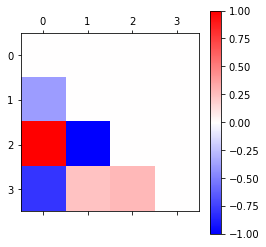

In [18]:
graph=average_coef_list_new.mean(axis=0)[0]
graph[abs(graph)<0.2]=0
plt.matshow(graph, cmap = 'bwr', vmin = -1, vmax = 1)
fig1 = plt.gcf()
plt.colorbar()
plt.show()

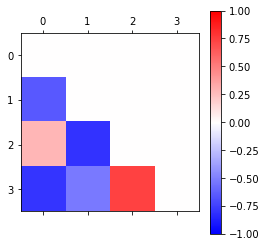

In [19]:
graph=average_coef_list_new.mean(axis=0)[5]
graph[abs(graph)<0.2]=0
plt.matshow(graph, cmap = 'bwr', vmin = -1, vmax = 1)
fig1 = plt.gcf()
plt.colorbar()
plt.show()

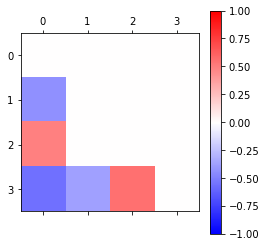

In [20]:
graph=average_coef_list_new.mean(axis=0)[10]
graph[abs(graph)<0.2]=0
plt.matshow(graph, cmap = 'bwr', vmin = -1, vmax = 1)
fig1 = plt.gcf()
plt.colorbar()
plt.show()

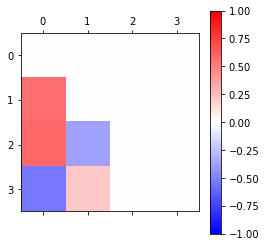

In [21]:
graph=average_coef_list_new.mean(axis=0)[15]
graph[abs(graph)<0.2]=0
plt.matshow(graph, cmap = 'bwr', vmin = -1, vmax = 1)
fig1 = plt.gcf()
plt.colorbar()
plt.show()

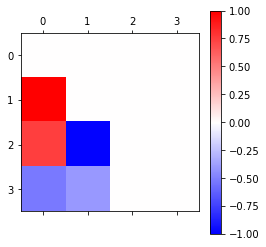

In [22]:
graph=average_coef_list_new.mean(axis=0)[19]
graph[abs(graph)<0.3]=0
plt.matshow(graph, cmap = 'bwr', vmin = -1, vmax = 1)
fig1 = plt.gcf()
plt.colorbar()
plt.show()

In [23]:
from utils import *
df=pd.DataFrame(columns=["TE","DE","IE"])
for i in range(20):
    # Calculate the averaged estimated weighted matrix B
    #average_B = matrix_gen(i).numpy().reshape(4,4)
    average_B = average_coef_list_new[:,i,:,:].reshape(4,4)
    # Calculate the estimated causal effects under the averaged estimated weighted matrix B
    TE, DE, IE, DM, IM = calculate_effect(average_B.T)
    df.loc[i]=[TE, DE, IE]

The total effect (TE): -0.1583968853735055
The natural direct effect (DE): -0.7929934859275818
The natural indirect effect (IE): 0.6345966005540763
The natural direct effect for mediators (DM): [-0.09392548  0.72852208]
The natural direct effect for mediators (IM): [2.49433084e-01 2.76760920e-06]
The total effect (TE): 0.10227260844083108
The natural direct effect (DE): -0.8271573185920715
The natural indirect effect (IE): 0.9294299270329026
The natural direct effect for mediators (DM): [-0.00439332  0.93382324]
The natural direct effect for mediators (IM): [ 3.92005031e-01 -1.28414079e-07]
The total effect (TE): 0.21028174081610174
The natural direct effect (DE): -0.8442849516868591
The natural indirect effect (IE): 1.0545666925029609
The natural direct effect for mediators (DM): [0.09689037 0.95767632]
The natural direct effect for mediators (IM): [4.74664808e-01 4.61080134e-06]
The total effect (TE): 0.21841283611610174
The natural direct effect (DE): -0.8443767428398132
The natural

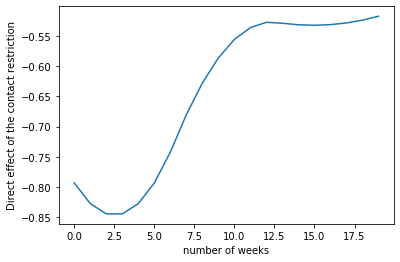

In [33]:
plt.plot(df["DE"]) ##contact restriction to new cases
plt.xlabel('number of weeks')
plt.ylabel('Direct effect of the contact restriction')
plt.savefig('figure/DE.pdf')

Text(0, 0.5, 'Direct effect of the contact restriction')

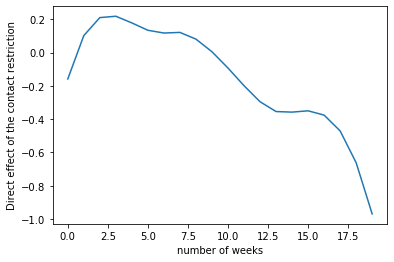

In [34]:
plt.plot(df["TE"]) ##contact restriction to new cases
plt.xlabel('number of weeks')
plt.ylabel('Direct effect of the contact restriction')

In [9]:
average_coef_list_new[0,0,::] #replicate, i

array([[-7.36120419e-05, -1.52441653e-05,  7.26166400e-05,
         7.36091461e-05],
       [-3.88047218e-01,  9.95456594e-06,  4.29638294e-06,
        -2.15338423e-05],
       [ 1.75015998e+00, -2.34822392e+00, -3.25405272e-05,
         1.89155020e-04],
       [-7.92993486e-01,  2.42051244e-01,  2.73749024e-01,
        -4.39479591e-05]])

In [57]:
feature_list

['Contact restrictions',
 'Mobility (mean)',
 'Searches corona',
 'Reported new cases COVID-19']

In [3]:
feature_list_short=['Contact restrictions',
 'Mobility',
 'Searches',
 'Reported new cases COVID-19']

In [33]:
pos = {
  0: [2.0,2.0],
  1: [3.0,1.0],
  2: [1.0,1.0],
  3: [2.0,0.0]
}

In [34]:
import numpy as np
average_coef_list_new=np.load("real_21_30_new.npy")

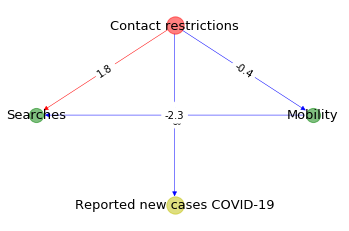

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
import matplotlib.pyplot as plt

time=0
average_B = average_coef_list_new[0,time,::].reshape(4,4)
average_B[np.abs(average_B) < 0.3] = 0 
plotG = nx.DiGraph(average_B.T)
edges,weights = zip(*nx.get_edge_attributes(plotG,'weight').items())
#pos = nx.spring_layout(plotG,seed=1234567) # positions for all nodes
nx.draw_networkx_nodes(plotG, pos,
                       nodelist = [0],
                       node_color = 'r',
                       node_size = 300,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos,
                       nodelist =[1,2],
                       node_color = 'g',
                       node_size = 200,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos, 
                       nodelist = [3],
                       node_color = 'y',
                       node_size = 300,
                   alpha = 0.5)

# edges with color an weight

# some math labels
labels={}
for i in range(len(feature_list_short)):
    labels[i] = (feature_list_short)[i]       
def color_edge(x):
    if x>0:
        return "r"
    else:
        return "b"

#edge_pos = nx.spring_layout(plotG, k=10)
edge_labels = {e: round(plotG.edges[e]['weight'],1) for e in plotG.edges}
edge_color = [color_edge(plotG.edges[e]['weight']) for e in plotG.edges]
nx.draw_networkx_edges(plotG, pos, width = .5, alpha = 1, edgelist=edges, edge_color=edge_color, edge_vmin=-1, edge_vmax=1)
nx.draw_networkx_labels(plotG, pos, labels, font_size = 13)
nx.draw_networkx_edge_labels(plotG,pos, edge_labels=edge_labels)
plt.axis('off')
#plt.show() # display
plt.savefig('figure/first_week.pdf')
#plt.savefig('figure/last_week.pdf')

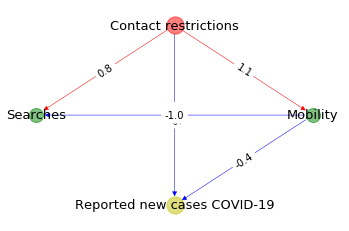

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
import matplotlib.pyplot as plt

time=-1
average_B = average_coef_list_new[0,time,::].reshape(4,4)
average_B[np.abs(average_B) < 0.3] = 0 
plotG = nx.DiGraph(average_B.T)
edges,weights = zip(*nx.get_edge_attributes(plotG,'weight').items())
#pos = nx.spring_layout(plotG,seed=1234567) # positions for all nodes
nx.draw_networkx_nodes(plotG, pos,
                       nodelist = [0],
                       node_color = 'r',
                       node_size = 300,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos,
                       nodelist =[1,2],
                       node_color = 'g',
                       node_size = 200,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos, 
                       nodelist = [3],
                       node_color = 'y',
                       node_size = 300,
                   alpha = 0.5)

# edges with color an weight

# some math labels
labels={}
for i in range(len(feature_list_short)):
    labels[i] = (feature_list_short)[i]       
def color_edge(x):
    if x>0:
        return "r"
    else:
        return "b"

#edge_pos = nx.spring_layout(plotG, k=10)
edge_labels = {e: round(plotG.edges[e]['weight'],1) for e in plotG.edges}
edge_color = [color_edge(plotG.edges[e]['weight']) for e in plotG.edges]
nx.draw_networkx_edges(plotG, pos, width = .5, alpha = 1, edgelist=edges, edge_color=edge_color, edge_vmin=-1, edge_vmax=1)
nx.draw_networkx_labels(plotG, pos, labels, font_size = 13)
nx.draw_networkx_edge_labels(plotG,pos, edge_labels=edge_labels)
plt.axis('off')
#plt.show() # display
#plt.savefig('figure/first_week.pdf')
plt.savefig('figure/last_week.pdf')

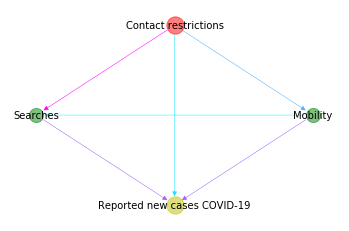

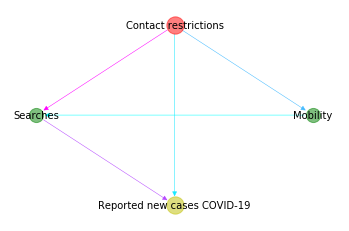

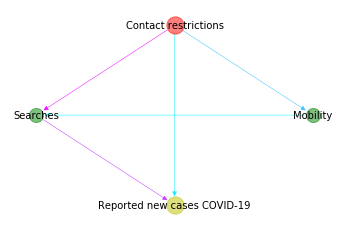

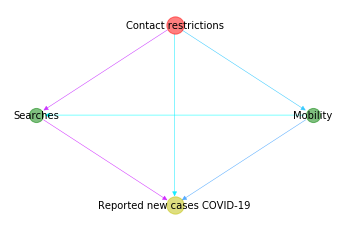

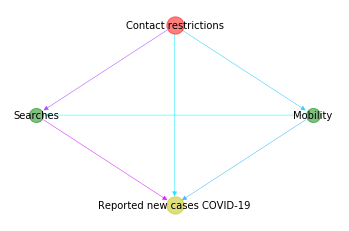

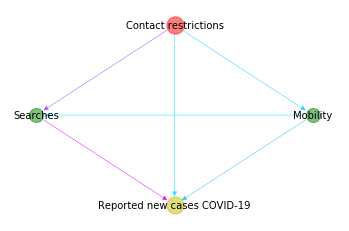

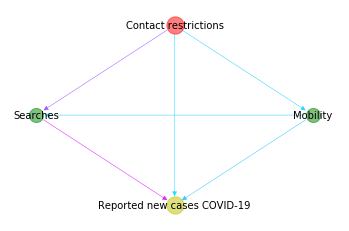

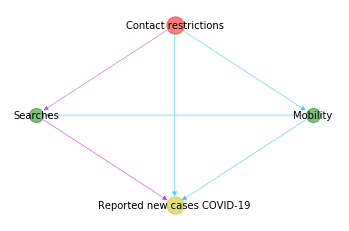

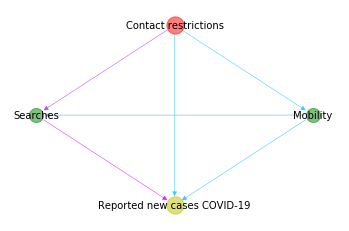

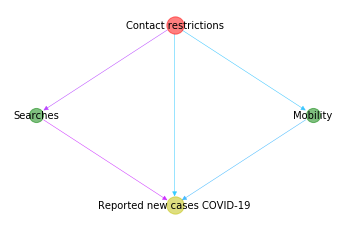

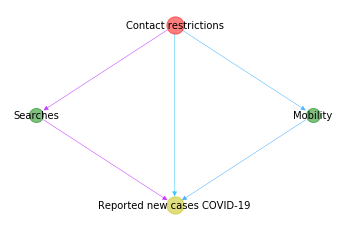

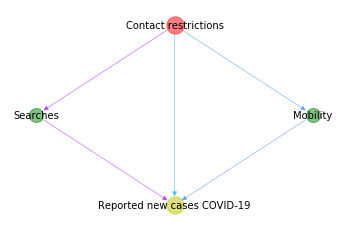

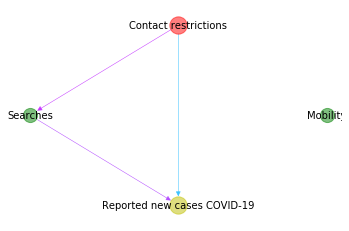

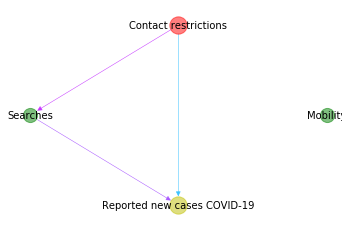

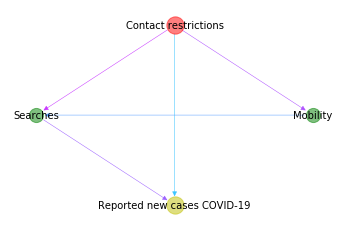

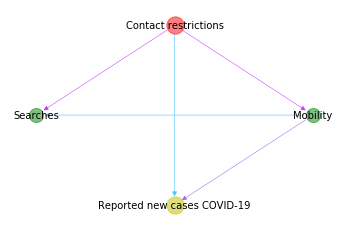

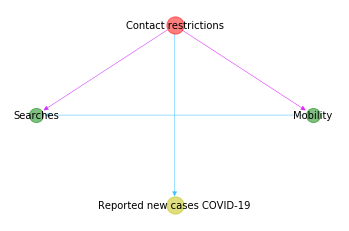

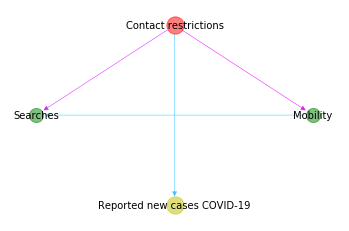

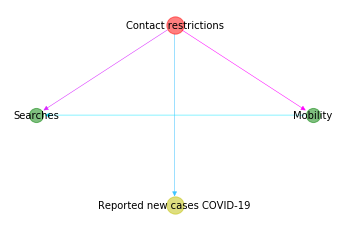

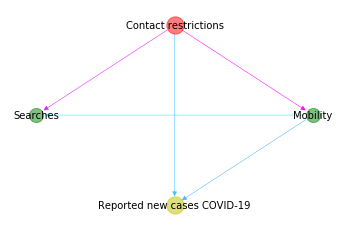

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
import matplotlib.pyplot as plt

for time in range(20):
    average_B = average_coef_list_new[0,time,::].reshape(4,4)
    average_B[np.abs(average_B) < 0.2] = 0 
    plotG = nx.DiGraph(average_B.T)
    edges,weights = zip(*nx.get_edge_attributes(plotG,'weight').items())
    #pos = nx.spring_layout(plotG,seed=1234567) # positions for all nodes
    nx.draw_networkx_nodes(plotG, pos,
                           nodelist = [0],
                           node_color = 'r',
                           node_size = 300,
                       alpha = 0.5)
    nx.draw_networkx_nodes(plotG, pos,
                           nodelist =[1,2],
                           node_color = 'g',
                           node_size = 200,
                       alpha = 0.5)
    nx.draw_networkx_nodes(plotG, pos, 
                           nodelist = [3],
                           node_color = 'y',
                           node_size = 300,
                       alpha = 0.5)

    # edges with color an weight
    nx.draw_networkx_edges(plotG, pos, width = .5, alpha = 1, edgelist=edges, edge_color=weights,edge_cmap=plt.cm.cool, edge_vmin=-1, edge_vmax=1)

    # some math labels
    labels={}
    for i in range(len(feature_list_short)):
        labels[i] = (feature_list_short)[i]       

    nx.draw_networkx_labels(plotG, pos, labels, font_size = 10)

    plt.axis('off')
    plt.show() # display

def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

filename = "multi_4.pdf"
save_multi_image(filename)

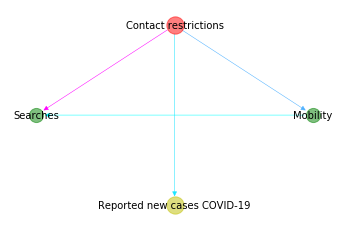

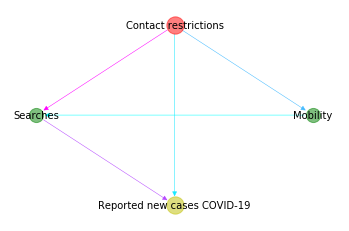

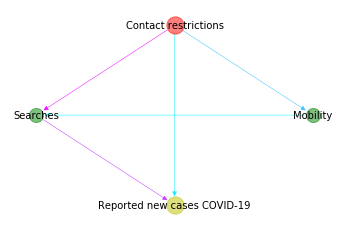

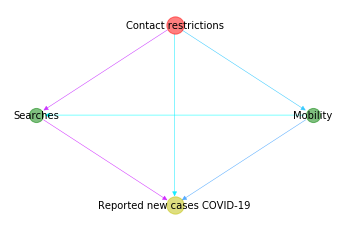

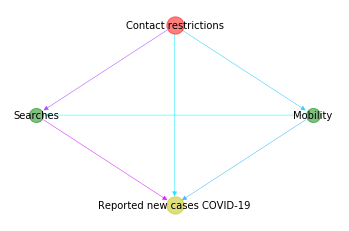

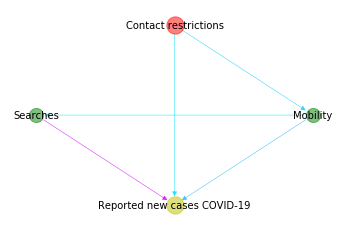

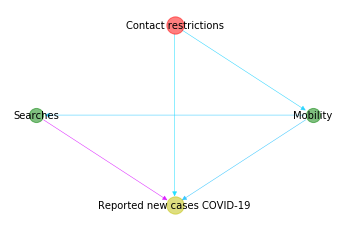

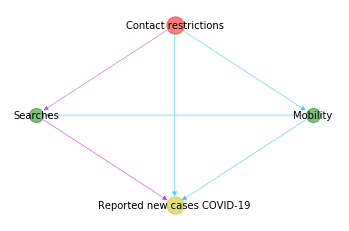

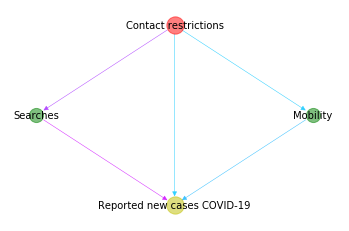

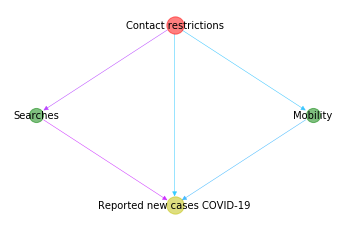

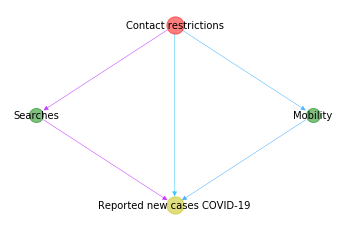

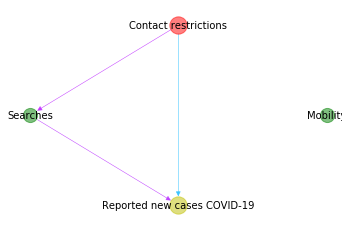

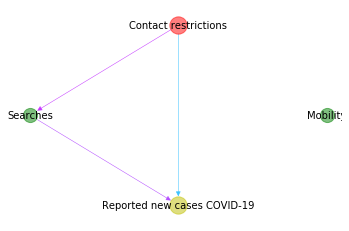

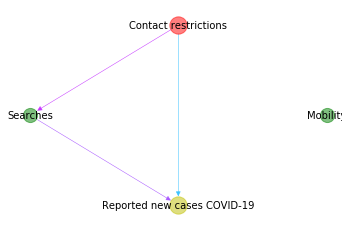

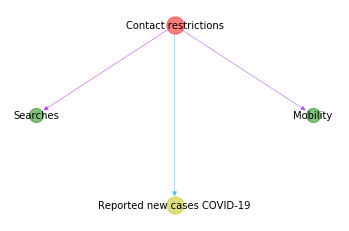

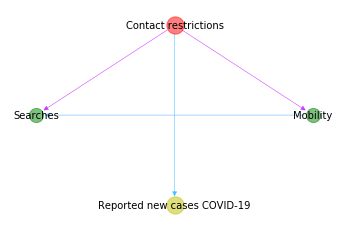

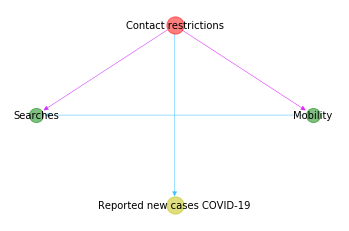

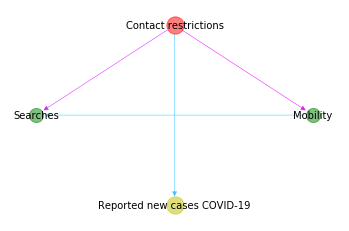

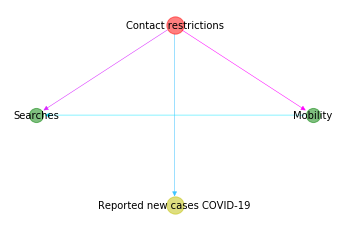

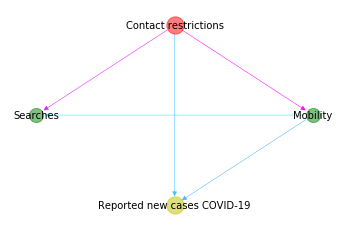

In [5]:
# Plot the estimated DAG for the coronavirus data.
import networkx as nx
import matplotlib.pyplot as plt
for time in range(20):
    average_B = average_coef_list_new[0,time,::].reshape(4,4)
    average_B[np.abs(average_B) < 0.2] = 0 
    plotG = nx.DiGraph(average_B.T)
    edges,weights = zip(*nx.get_edge_attributes(plotG,'weight').items())
    #pos = nx.spring_layout(plotG,seed=1234567) # positions for all nodes
    nx.draw_networkx_nodes(plotG, pos,
                           nodelist = [0],
                           node_color = 'r',
                           node_size = 300,
                       alpha = 0.5)
    nx.draw_networkx_nodes(plotG, pos,
                           nodelist =[1,2],
                           node_color = 'g',
                           node_size = 200,
                       alpha = 0.5)
    nx.draw_networkx_nodes(plotG, pos, 
                           nodelist = [3],
                           node_color = 'y',
                           node_size = 300,
                       alpha = 0.5)

    # edges with color an weight
    nx.draw_networkx_edges(plotG, pos, width = .5, alpha = 1, edgelist=edges, edge_color=weights,edge_cmap=plt.cm.cool, edge_vmin=-1, edge_vmax=1)

    # some math labels
    labels={}
    for i in range(len(feature_list_short)):
        labels[i] = (feature_list_short)[i]       

    nx.draw_networkx_labels(plotG, pos, labels, font_size = 10)

    plt.axis('off')
    plt.show() # display


In [ ]:
#python train.py --data_type=realdata --real_data_file=covid_july.pkl --node_number=6 --sample_size=30 --batch_size=18 --rep_number=10 --name=july